### Google BLEU scores

In [1]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import SmoothingFunction

In [2]:
actual = list()
predicted = list()

In [9]:
actual = (open('actual.txt', encoding='utf-8', errors='ignore').read()).split("\n")[:-1]
google_predictions = (open('google_predicted.txt', encoding='utf-8', errors='ignore').read()).split("\n")[:-1]

In [10]:
len(actual), len(google_predictions)

(60, 60)

In [15]:
actual = [item.lower() for item in actual]
google_predictions = [item.lower() for item in google_predictions]

In [18]:
actual_clean = []
for line in actual:
    estr = re.sub(r'[^\x00-\x7F]+',' ', line)
    estr = estr.strip()
    actual_clean.append(estr)

In [19]:
predicted_clean = []
for line in google_predictions:
    estr = re.sub(r'[^\x00-\x7F]+',' ', line)
    estr = estr.strip()
    predicted_clean.append(estr)

In [21]:
# calculate BLEU score
cc = SmoothingFunction()
print('BLEU-1: %f' % corpus_bleu(actual_clean, predicted_clean, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual_clean, predicted_clean, weights=(0.5, 0.5, 0, 0), smoothing_function=cc.method4))
print('BLEU-3: %f' % corpus_bleu(actual_clean, predicted_clean, weights=(0.33, 0.33, 0.33, 0), smoothing_function=cc.method4))
print('BLEU-4: %f' % corpus_bleu(actual_clean, predicted_clean, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=cc.method4))

c:\users\rrich\appdata\local\programs\python\python36-32\lib\site-packages\nltk\translate\bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1: 0.457907
BLEU-2: 0.467466
BLEU-3: 0.416962
BLEU-4: 0.362342


### Google BLEU scores according to sentence length

In [34]:
actual1 , actual2 , actual3 , actual4 = list(), list(), list(), list()
predicted1 , predicted2 , predicted3 , predicted4 = list(), list(), list(), list()

In [35]:
actual1 = (open('actual1.txt', encoding='utf-8', errors='ignore').read()).split("\n")[:-1]
actual2 = (open('actual2.txt', encoding='utf-8', errors='ignore').read()).split("\n")[:-1]
actual3 = (open('actual3.txt', encoding='utf-8', errors='ignore').read()).split("\n")[:-1]
actual4 = (open('actual4.txt', encoding='utf-8', errors='ignore').read()).split("\n")[:-1]

In [36]:
len(actual1), len(actual2), len(actual3), len(actual4)

(13, 12, 13, 19)

In [37]:
google1 = (open('google1.txt', encoding='utf-8', errors='ignore').read()).split("\n")[:-1]
google2 = (open('google2.txt', encoding='utf-8', errors='ignore').read()).split("\n")[:-1]
google3 = (open('google3.txt', encoding='utf-8', errors='ignore').read()).split("\n")[:-1]
google4 = (open('google4.txt', encoding='utf-8', errors='ignore').read()).split("\n")[:-1]

In [38]:
len(google1), len(google2), len(google3), len(google4)

(13, 12, 13, 19)

In [39]:
actual1 = [item.lower() for item in actual1]
actual2 = [item.lower() for item in actual2]
actual3 = [item.lower() for item in actual3]
actual4 = [item.lower() for item in actual4]

In [40]:
google1 = [item.lower() for item in google1]
google2 = [item.lower() for item in google2]
google3 = [item.lower() for item in google3]
google4 = [item.lower() for item in google4]

In [46]:
def clean_up(sent_list):
    clean_list = []
    for line in sent_list:
        estr = re.sub(r'[^\x00-\x7F]+',' ', line)
        estr = estr.strip()
        clean_list.append(estr)
    return clean_list

In [47]:
actual_one = clean_up(actual1)
actual_two = clean_up(actual2)
actual_three = clean_up(actual3)
actual_four = clean_up(actual4)

In [48]:
google_one = clean_up(google1)
google_two = clean_up(google2)
google_three = clean_up(google3)
google_four = clean_up(google4)

In [49]:
# One word sentence BLEU score
cc = SmoothingFunction()
print('BLEU-1: %f' % corpus_bleu(actual_one, google_one, weights=(1.0, 0, 0, 0)))

BLEU-1: 0.710280


c:\users\rrich\appdata\local\programs\python\python36-32\lib\site-packages\nltk\translate\bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [50]:
# Two word sentence BLEU score
cc = SmoothingFunction()
print('BLEU-1: %f' % corpus_bleu(actual_two, google_two, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual_two, google_two, weights=(0.5, 0.5, 0, 0), smoothing_function=cc.method4))

BLEU-1: 0.576720
BLEU-2: 0.469389


c:\users\rrich\appdata\local\programs\python\python36-32\lib\site-packages\nltk\translate\bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [51]:
# Three word sentence BLEU score
cc = SmoothingFunction()
print('BLEU-1: %f' % corpus_bleu(actual_three, google_three, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual_three, google_three, weights=(0.5, 0.5, 0, 0), smoothing_function=cc.method4))
print('BLEU-3: %f' % corpus_bleu(actual_three, google_three, weights=(0.33, 0.33, 0.33, 0), smoothing_function=cc.method4))

BLEU-1: 0.504237
BLEU-2: 0.429779
BLEU-3: 0.370922


c:\users\rrich\appdata\local\programs\python\python36-32\lib\site-packages\nltk\translate\bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [52]:
# Four word sentence BLEU score
cc = SmoothingFunction()
print('BLEU-1: %f' % corpus_bleu(actual_four, google_four, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual_four, google_four, weights=(0.5, 0.5, 0, 0), smoothing_function=cc.method4))
print('BLEU-3: %f' % corpus_bleu(actual_four, google_four, weights=(0.33, 0.33, 0.33, 0), smoothing_function=cc.method4))
print('BLEU-4: %f' % corpus_bleu(actual_four, google_four, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=cc.method4))

c:\users\rrich\appdata\local\programs\python\python36-32\lib\site-packages\nltk\translate\bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1: 0.367461
BLEU-2: 0.418762
BLEU-3: 0.387757
BLEU-4: 0.342947


### BLEU score plots

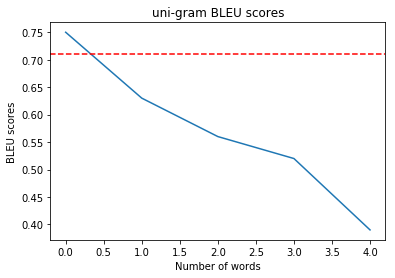

In [53]:
#uni-gram BLEU scores
lengths = list()
unigram = list()
unigram = [0.75, 0.63, 0.56, 0.52, 0.39]
lengths = [1, 2, 3, 4, 5]
plt.plot(unigram)
plt.axhline(y=0.71, color='r', linestyle='--')
plt.title('uni-gram BLEU scores')
plt.ylabel('BLEU scores')
plt.xlabel('Number of words')
plt.show()

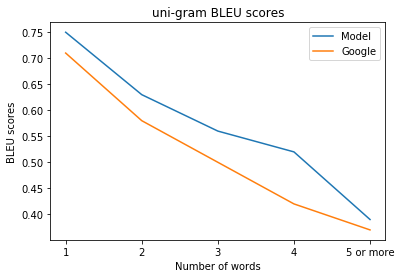

In [60]:
#bi-gram BLEU scores
lengths = list()
unigram = list()
unigram = [0.75, 0.63, 0.56, 0.52, 0.39]
google_uni = [0.71, 0.58, 0.5, 0.42, 0.37]
lengths = ['1', '2', '3', '4', '5 or more']
plt.plot(lengths, unigram)
plt.plot(lengths, google_uni)
#plt.axhline(y=0.71, color='r', linestyle='--')
plt.title('uni-gram BLEU scores')
plt.ylabel('BLEU scores')
plt.xlabel('Number of words')
plt.legend(['Model', 'Google'], loc='upper right')
plt.show()

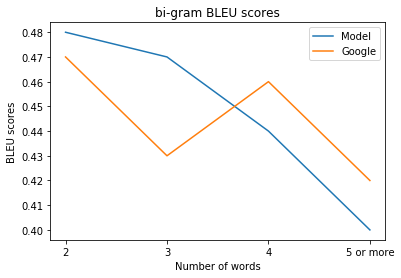

In [62]:
#bi-gram BLEU scores
lengths = list()
bigram = list()
bigram = [0.48, 0.47, 0.44, 0.4]
google_bi = [0.47, 0.43, 0.46, 0.42]
lengths = ['2', '3', '4', '5 or more']
plt.plot(lengths, bigram)
plt.plot(lengths, google_bi)
#plt.axhline(y=0.71, color='r', linestyle='--')
plt.title('bi-gram BLEU scores')
plt.ylabel('BLEU scores')
plt.xlabel('Number of words')
plt.legend(['Model', 'Google'], loc='upper right')
plt.show()

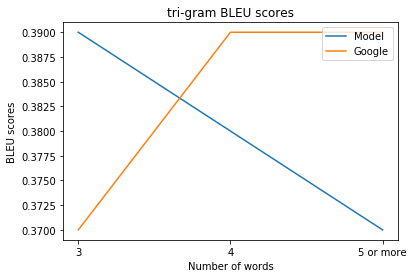

In [63]:
#bi-gram BLEU scores
lengths = list()
trigram = list()
trigram = [0.39, 0.38, 0.37]
google_tri = [0.37, 0.39, 0.39]
lengths = ['3', '4', '5 or more']
plt.plot(lengths, trigram)
plt.plot(lengths, google_tri)
#plt.axhline(y=0.71, color='r', linestyle='--')
plt.title('tri-gram BLEU scores')
plt.ylabel('BLEU scores')
plt.xlabel('Number of words')
plt.legend(['Model', 'Google'], loc='upper right')
plt.show()